## **Armas de Fogo e Violência: Uma Análise Multifacetada da Relação entre Posse de Armas e Homicídios no Contexto Global** part1.


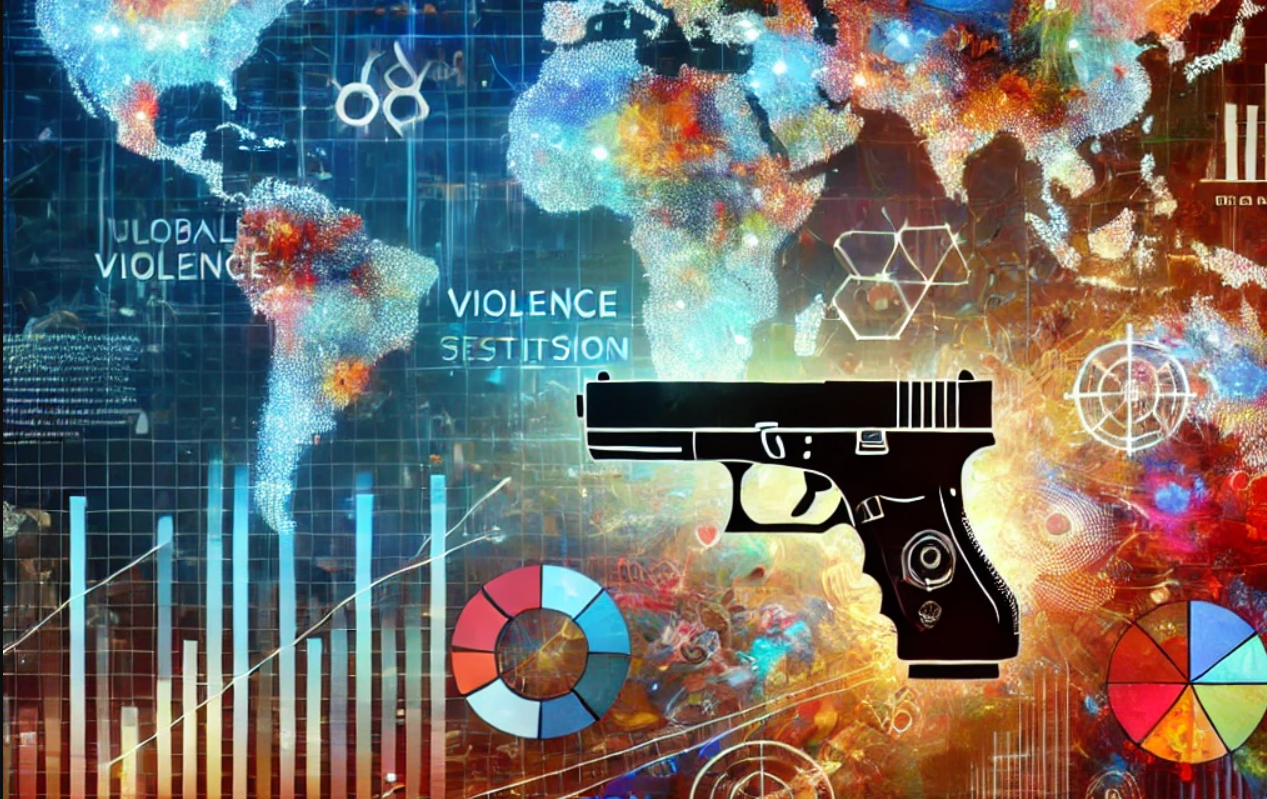

### O objetivo final dessa parte do projeto é o agrupamento de países a partir da semelhança de 3 características: tamanho da população, mortes (por 100k habitantes) e posse de armas (100 habitantes).

### Para tal, utilizou-se de uma modelagem de machine learning denominada clustering. A partir desse trabalho descobrimos a quantidade ideal de agrupamento para esse grupo de países, dado essas 3 características.

### Após isso, fez-se um resumo das características gerais desses países no que se refere ao modo deles de lidarem com a questão violência.

## **Cluster 0:**
* ### Este cluster reúne países de médio a grande porte populacional, como **Afeganistão**, **Albânia**, **Argélia**, **Angola**, e **Argentina**. Embora a posse de armas civis varie bastante, as taxas de mortes violentas são relativamente baixas em comparação com outros grupos. Esses países enfrentam desafios como instabilidade política, conflitos regionais e, em alguns casos, a presença de grupos insurgentes e milícias armadas. No entanto, o controle territorial por parte de organizações criminosas é mais fraco aqui do que em clusters mais violentos.

## **Cluster 1:**
* ### O **Cluster 1** agrupa **China** e **Índia**, as duas nações mais populosas do mundo. Embora a posse de armas civis seja baixa e as taxas de mortes violentas sejam mínimas, ambos os países enfrentam questões relacionadas à segurança interna, como insurgências regionais e tensões de fronteira. No entanto, o controle estatal e o policiamento mantêm níveis de violência dentro de padrões controláveis.

## **Cluster 2:**
* ### Países europeus como **Áustria**, **Bósnia e Herzegovina**, **Canadá**, **Chipre**, e **Finlândia** compõem o **Cluster 2**. Eles apresentam uma posse de armas civis relativamente alta, mas as taxas de violência são extremamente baixas. Esses países possuem altos níveis de desenvolvimento socioeconômico, com sistemas jurídicos estáveis e de confiança. A segurança é robusta, e não há domínio significativo de grupos criminosos ou gangues, o que permite que a posse de armas civis ocorra em um ambiente de baixa violência.

## **Cluster 3 (O Cluster Mais Violento):**
* ### O **Cluster 3** concentra os países com as mais altas taxas de violência, como **Brasil**, **Colômbia**, **El Salvador**, **Guatemala**, e **Honduras**. Esse grupo é caracterizado por níveis alarmantes de mortes violentas, que muitas vezes estão associadas a altos índices de tráfico de drogas, crime organizado e, especialmente, o domínio territorial de grupos criminosos. Na América Latina, fatores como a desigualdade social, corrupção institucional e a falta de controle estatal sobre territórios influenciam diretamente os padrões de violência. O domínio territorial por gangues e facções criminosas é evidente nesses países, tornando-os epicentros de violência letal, principalmente em áreas urbanas e regiões com pouca presença do Estado.

### **Cluster 4:**
* ### O **Cluster 4** contém apenas os **Estados Unidos**, um país com a maior taxa de posse de armas civis (1.205 armas por 100 habitantes). Embora a taxa de mortes violentas seja consideravelmente menor em comparação com o Cluster 3, o número total de armas em circulação é uma característica distintiva. Questões como a regulamentação frouxa em torno da posse de armas, tensões raciais, e violência relacionada a gangues urbanas e atiradores em massa contribuem para a persistência de um alto nível de mortes violentas, mesmo que ainda esteja distante da realidade latino-americana.




#### Note que o Brasil se encontra no grupo 3, junto com  México, Colômbia, El Salvador, Vezenuela e outros. Isso é mais que um sinal de que a coisa está muito ruim.



---



### Vamos ao trabalho:

#### Carrego algumas bibliotecas que vou utilizar sempre

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import gspread as gs

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
import plotly.express as px
import plotly.graph_objects as go

#### Vou carregar a base de dados extraída do ranking Global Peace Index (GPI):

In [4]:
url = "https://docs.google.com/spreadsheets/d/1N2WuobFrBv-S-ybZ54w3Jky3amdosK2dpBJnbd74AN4/export?format=csv"
dados_perigo = pd.read_csv(url)

In [5]:
dados_perigo.head()

,country,gpi2023,gpi2022,gpi2021
0,Afghanistan,"34,48","35,54","36,31"
1,Albania,"17,45","17,61","18,24"
2,Algeria,"20,94","21,46","23,1"
3,Angola,"20,2","19,82","20,17"
4,Argentina,"18,37","19,11","19,45"


In [6]:
#vou colocar ponto onde há vírgula no dados_perigo
dados_perigo = dados_perigo.replace(',','.', regex=True)

In [17]:
dados_perigo.head()

,country,gpi2023,gpi2022,gpi2021
0,Afghanistan,34.48,35.54,36.31
1,Albania,17.45,17.61,18.24
2,Algeria,20.94,21.46,23.1
3,Angola,20.2,19.82,20.17
4,Argentina,18.37,19.11,19.45


## Vou carregar os dados acerca da quantidade de armas por cidadão:

In [20]:
url1 = "https://docs.google.com/spreadsheets/d/16FRJ0IlLevIvBnaLV9fY8nZYZO-bR2On-yix7wC5nb8/export?format=csv"
posse_armas = pd.read_csv(url1)

In [21]:
posse_armas.head()

,country,armas civis,armas_per_100
0,Afghanistan,4270000,125.0
1,Albania,350000,120.0
2,Algeria,877000,21.0
3,American Samoa,400,7.0
4,Andorra,10000,141.0


### Dados acerca das mortes totais e violentas por país

In [10]:
url3 = "https://docs.google.com/spreadsheets/d/1y_jvjhj-Ca92oUzlAPZV1FoCjYN6F11ch6ILaN4mSzw/export?format=csv"
mortes_armas= pd.read_csv(url3)

In [11]:
mortes_armas.head()

,country,mortes totais,violent mortes,mortes violentas a cada 100k pessoas
0,Afghanistan,621.0,434.0,"1,13"
1,Albania,70.0,40.0,"1,47"
2,Algeria,254.0,135.0,"0,32"
3,American Samoa,NaN,NaN,"0,42"
4,Andorra,1.0,NaN,"0,09"


In [12]:
#vou trocar vírgula por ponto
mortes_armas = mortes_armas.replace(',','.', regex=True)

In [13]:
url3 = "https://docs.google.com/spreadsheets/d/1WIW5VzrnrVZlYnvPRGKwr0mv349jTJ7MGCS6VE6FbHo/export?format=csv"
dados_pop = pd.read_csv(url3)

In [14]:
# Remove pontos e vírgulas e converte para inteiro
dados_pop['pop'] = dados_pop['pop'].str.replace(r'[.,]', '', regex=True).astype(int)

In [15]:
dados_pop.head()

,country,pop
0,China,1409670000
1,India,1404910000
2,United States,335893238
3,Indonesia,281603800
4,Pakistan,241499431


## Juntar as colunas de dados que me interessam em um dataframe só

In [22]:
#vou juntar os dataframes mortes_armas, posse_armas e dados_perigo a partir da coluna country utilizando merged
df = pd.merge(mortes_armas, dados_perigo, on='country')
df = pd.merge(df, dados_pop, on='country')
df = pd.merge(df, posse_armas, on='country')

In [ ]:
df.head()

,country,mortes totais,violent mortes,mortes violentas a cada 100k pessoas,gpi2023,gpi2022,gpi2021,pop,armas civis,armas_per_100
0,Afghanistan,621.0,434.0,1.13,34.48,35.54,36.31,34262840,4270000,125.0
1,Albania,70.0,40.0,1.47,17.45,17.61,18.24,2761785,350000,120.0
2,Algeria,254.0,135.0,0.32,20.94,21.46,23.1,46700000,877000,21.0
3,Angola,417.0,161.0,0.53,20.2,19.82,20.17,35121734,2982000,112.0
4,Argentina,3309.0,1709.0,3.79,18.37,19.11,19.45,47067441,3256000,74.0


## Organizar os dados

In [23]:
# Renomear colunas para torná-las mais consistentes
df.columns = ['country', 'total_deaths', 'violent_deaths', 'violent_deaths_per_100k', 'gpi_2023', 'gpi_2022', 'gpi_2021', 'pop', 'civilian_firearms', 'civilian_firearms_per_100']

In [ ]:
# Tratar valores ausentes
# Preencher valores ausentes com 0 para colunas numéricas
df['total_deaths'].fillna(0, inplace=True)
df['violent_deaths'].fillna(0, inplace=True)
df['violent_deaths_per_100k'].fillna(0, inplace=True)
df['civilian_firearms'].fillna(0, inplace=True)
df['civilian_firearms_per_100'].fillna(0, inplace=True)
df['pop'].fillna(0, inplace=True)
df['gpi_2023'].fillna(0, inplace=True)
df['gpi_2022'].fillna(0, inplace=True)
df['gpi_2021'].fillna(0, inplace=True)

In [27]:
# Verificar e converter tipos de dados
df['total_deaths'] = df['total_deaths'].astype(float)
df['violent_deaths'] = df['violent_deaths'].astype(float)
df['violent_deaths_per_100k'] = df['violent_deaths_per_100k'].astype(float)
df['civilian_firearms'] = df['civilian_firearms'].astype(int)
df['civilian_firearms_per_100'] = df['civilian_firearms_per_100'].astype(int)
df['pop'] = df['pop'].astype(float)

## Veja um trecho de como ficou o dataframe organizado

In [28]:
df.head()

,country,total_deaths,violent_deaths,violent_deaths_per_100k,gpi_2023,gpi_2022,gpi_2021,pop,civilian_firearms,civilian_firearms_per_100
0,Afghanistan,621.0,434.0,1.13,34.48,35.54,36.31,34262840.0,4270000,125
1,Albania,70.0,40.0,1.47,17.45,17.61,18.24,2761785.0,350000,120
2,Algeria,254.0,135.0,0.32,20.94,21.46,23.1,46700000.0,877000,21
3,Angola,417.0,161.0,0.53,20.2,19.82,20.17,35121734.0,2982000,112
4,Argentina,3309.0,1709.0,3.79,18.37,19.11,19.45,47067441.0,3256000,74


## Vou criar um mapa para visualizar a distribuição de mortes violentas por 100 habitantes por país.

In [ ]:
# Criar o mapa
fig_map0 = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="violent_deaths_per_100k",
                    color_continuous_scale=['plum', "mediumpurple", "mediumblue", "navy"],
                    range_color=(0, 25),
                    title='Mortes Violentas por 100 mil Habitantes por País',
                    labels={'violent_deaths_per_100k': 'Mortes Violentas por 100 mil Habitantes'},
                    )

# Ajustar o layout
fig_map0.update_layout(
    title_text='',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    # Configurar o tamanho e a largura do gráfico
    width=1000,  # Largura em pixels
    height=600   # Altura em pixels
)

# Mostrar o gráfico
fig_map0.show()

In [ ]:
# Criar o heatmap
fig_map1 = px.choropleth(df,
                    locations="country",
                    locationmode="country names",
                    color="civilian_firearms_per_100",
                    color_continuous_scale= ['lightsalmon', 'red', 'firebrick'],
                    range_color=(0, 1200),
                    title='Armas nas mãos de civis por 100 mil habitantes por país')

# Ajustar o layout
fig_map1.update_layout(
    title_text='',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    # Configurar o tamanho e a largura do gráfico
    width=1000,  # Largura em pixels
    height=600   # Altura em pixels
)

# Mostrar o gráfico
fig_map1.show()

### Veja um pairplot para visualizar as possíveis correlações existentes entre as variáveis

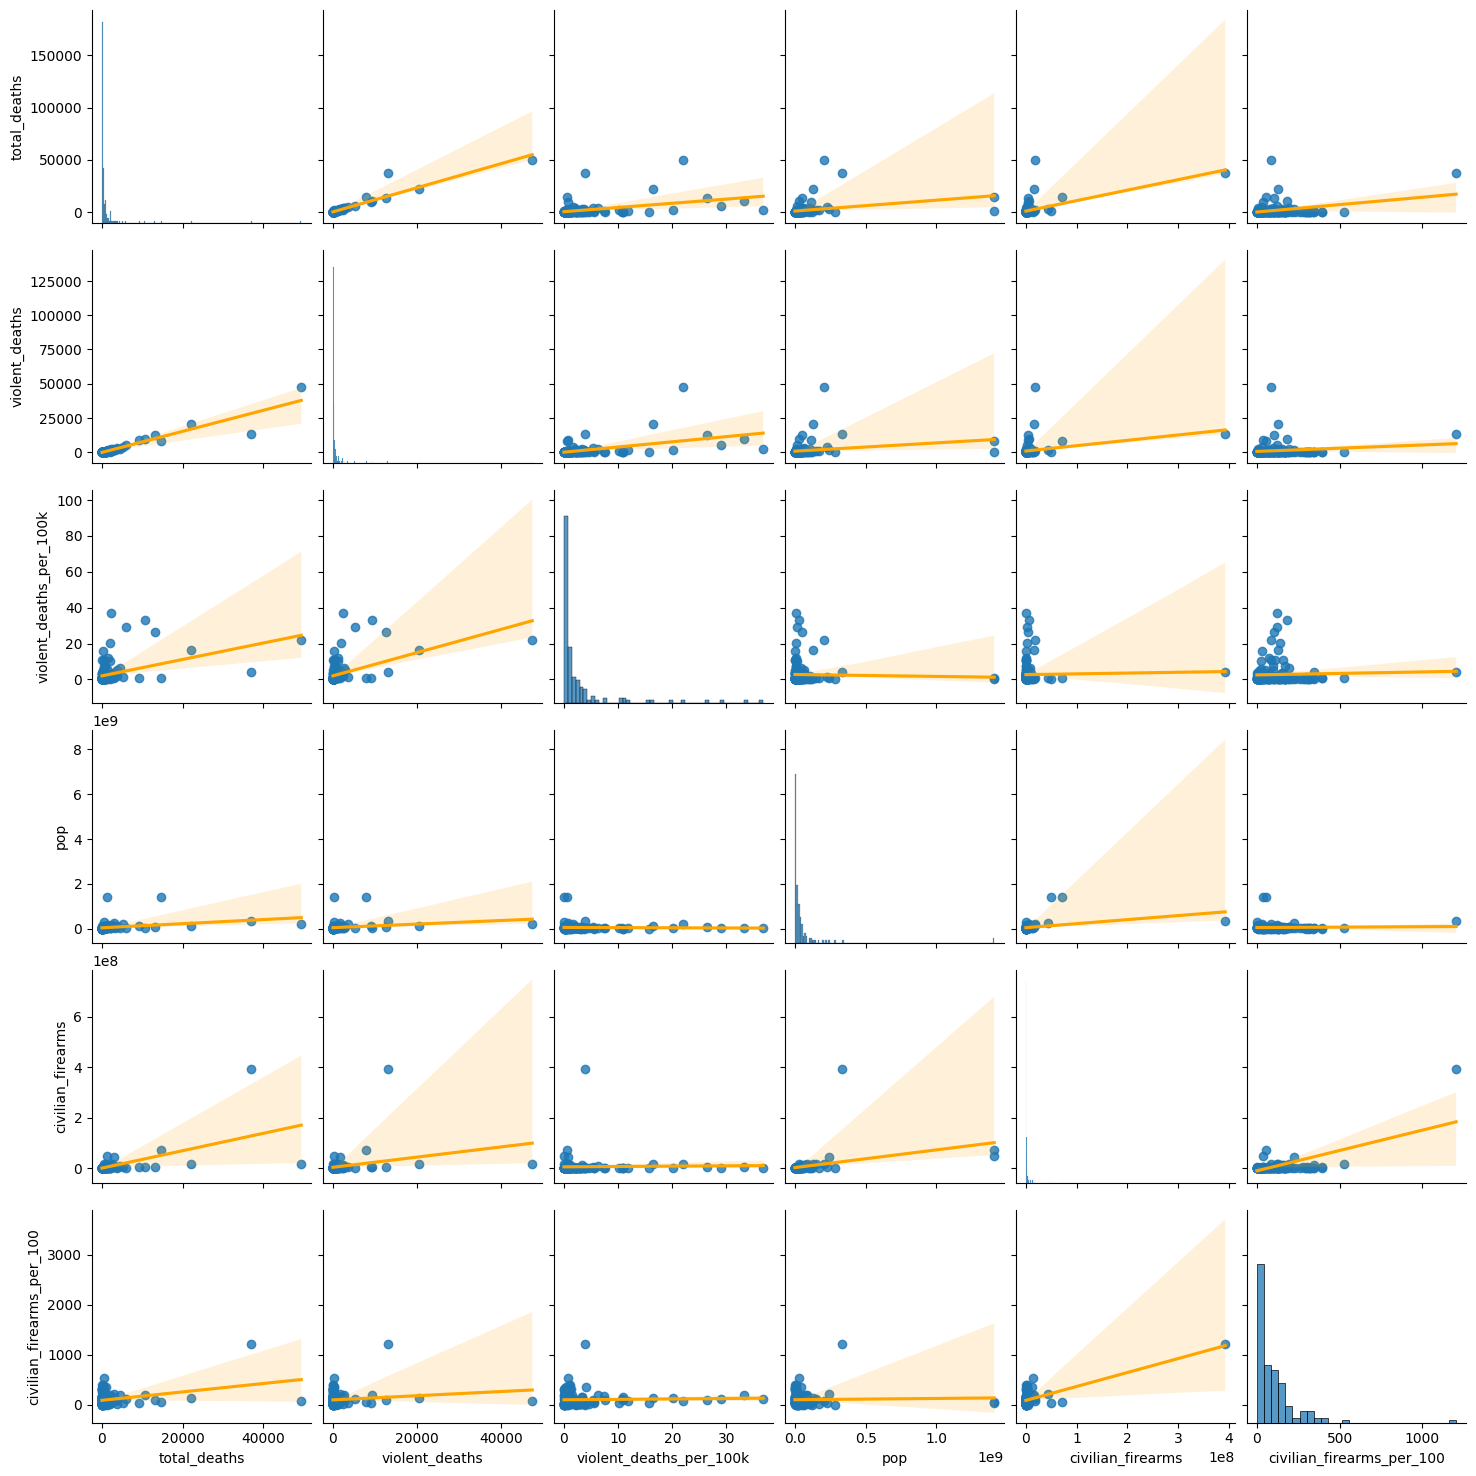

In [ ]:
#vou criar um pairplot com uma linh de cor laranja para ver a relação entre as variáveis
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'orange'}})
plt.show()

### Veja que não há nada muito evidente olhando de primeira. Nenhuma relação positiva e nem negativa muito clara constante e óbvia.

## Estudo da correlação


---



### Correlação entre as diferentes colunas de dados do dataframe:

In [29]:
# Filtrar apenas as colunas numéricas
numeric_df = df.select_dtypes(include='number')

# vejamos a correlação entre as colunas
correlation_matrix = numeric_df.corr()

### Vou ver isso em um gráfico heatmap da correlação:

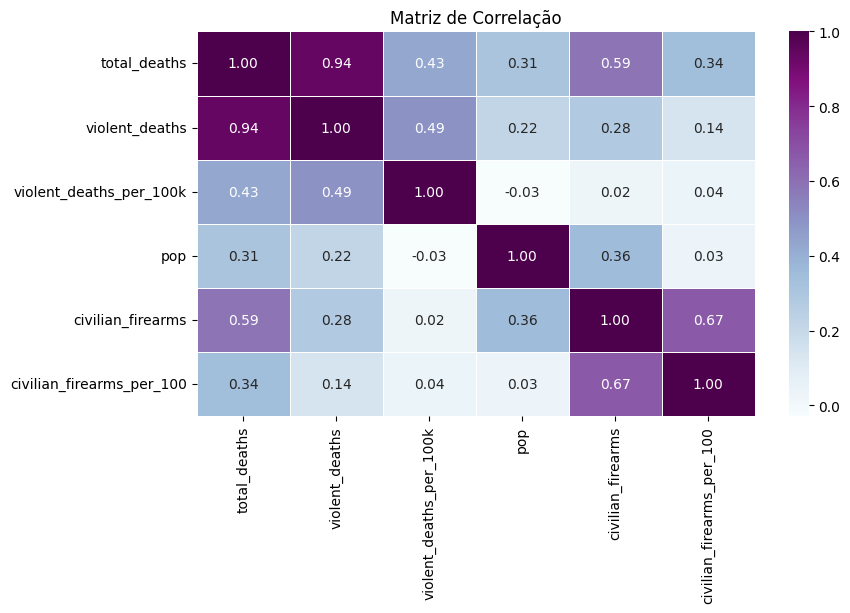

In [30]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 5))

# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)

# Configurar título e rótulos
plt.title('Matriz de Correlação')
plt.show()

### A matriz de correlação mostra a relação entre diferentes variáveis numéricas. Os valores variam de -1 a 1, onde valores próximos de 1 indicam uma correlação positiva forte, valores próximos de -1 indicam uma correlação negativa forte, e valores próximos de 0 indicam pouca ou nenhuma correlação.

#### -  total_deaths e violent_deaths: Essa é a correlação mais óbvia. Têm uma correlação muito alta (0,94), sugerindo que onde há mais mortes totais, há também mais mortes violentas.

#### -   total_deaths e civilian_firearms: têm uma correlação positiva moderada (0,59), indicando que, à medida que o número de armas de fogo civis aumenta, o número total de mortes também tende a aumentar.

#### -  violent_deaths_per_100k e civilian_firearms têm uma correlação quase nula (0,02), sugerindo que a posse de armas de fogo por civis não está fortemente relacionada com as mortes violentas por 100 mil habitantes.

#### Esses valores ajudam a identificar quais variáveis têm relações mais fortes entre si.

### Vou estudar a correlação individualmente agora

## Visualizando os dados individualmente:

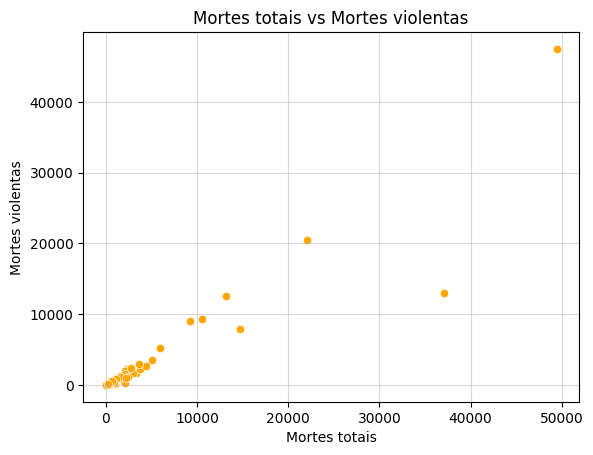

In [32]:
#quero visualizar a dispersão de mortes
sns.scatterplot(x='total_deaths', y='violent_deaths', data = df, color = 'orange')
plt.title('Mortes totais vs Mortes violentas')
plt.xlabel('Mortes totais')
plt.ylabel('Mortes violentas')
plt.grid(True, alpha = 0.5)
plt.show()

### Veja a tendência de subida das mortes violentas conforme o total de mortes se eleva. Essa é uma relação óbvia.

### Veja esse outro gráfico que interessante:

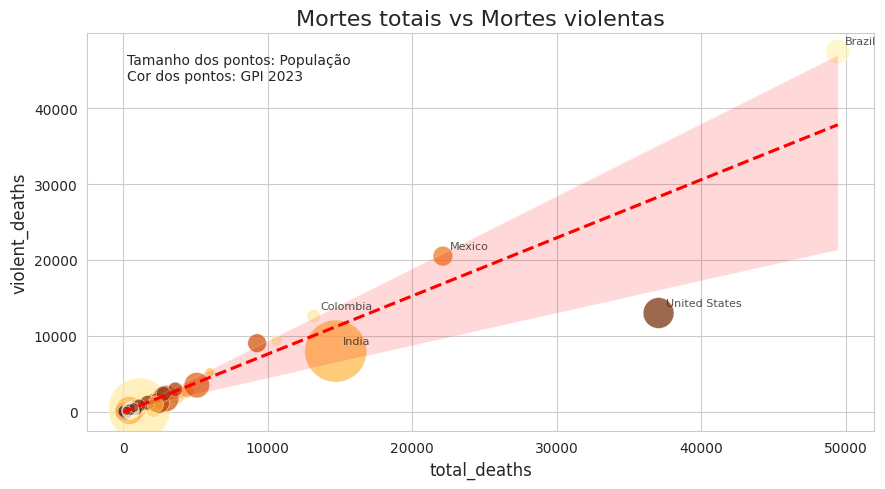

In [38]:
# Configurar o estilo do Seaborn
sns.set_style("whitegrid")

# Criar o gráfico de dispersão
plt.figure(figsize=(9, 5))
scatter = sns.scatterplot(
    data=df,
    x='total_deaths',
    y='violent_deaths',
    size='pop',  # Tamanho dos pontos baseado na população
    sizes=(20, 2000),  # Range de tamanhos dos pontos
    hue='gpi_2023',  # Cor baseada no GPI 2023
    palette='YlOrBr',  # Paleta de cores
    alpha=0.7,  # Transparência dos pontos
    legend=False  # Remove a legenda
)

# Adicionar rótulos e título
plt.title('Mortes totais vs Mortes violentas', fontsize=16)
plt.xlabel('Mortes totais', fontsize=12)
plt.ylabel('Mortes violentas', fontsize=12)

# Adicionar uma linha de regressão
sns.regplot(
    data=df,
    x='total_deaths',
    y='violent_deaths',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--'}
)

# Adicionar rótulos para alguns países (por exemplo, os 5 com mais mortes totais)
top_5 = df.nlargest(5, 'total_deaths')
for idx, row in top_5.iterrows():
    plt.annotate(
        row['country'],
        (row['total_deaths'], row['violent_deaths']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        alpha=0.8
    )

# Adicionar uma nota explicativa
plt.text(0.05, 0.95, 'Tamanho dos pontos: População\nCor dos pontos: GPI 2023',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Maior o círculo, maior é a população no país. Veja como O caso do Brasil é muito assustador. A população é grande e tudo, mas o número de mortes e de mortes violentas é muito muito elevado. Veja a China, que aquela grande bolha amarela lá embaixo e note a diferença de mortes anuais, mesmo com uma população muito maior.
### É incrível o mau desempenho do Brasil e como ele consegue ser um exemplo legítimo do que não fazer na parte de segurança.

### Visualizar a dispersão de mortes a cada 100 mil habitantes

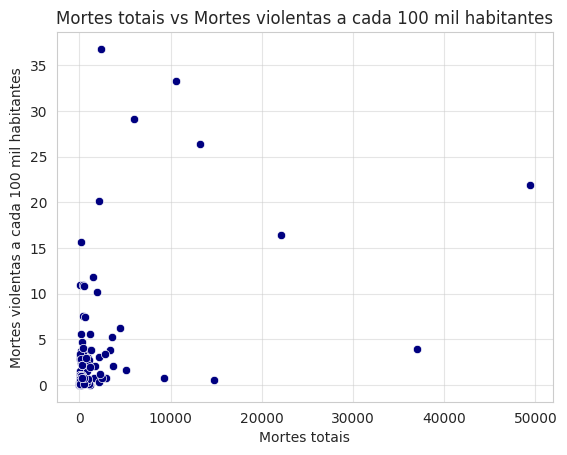

In [40]:
#quero visualizar a dispersão de mortes a cada 100 mil habitantes
sns.scatterplot(x='total_deaths', y='violent_deaths_per_100k', data=df, color = 'navy')
plt.title('Mortes totais vs Mortes violentas a cada 100 mil habitantes')
plt.xlabel('Mortes totais')
plt.ylabel('Mortes violentas a cada 100 mil habitantes')
plt.grid(True, alpha = 0.5)
plt.show()

### Finalmente um mais interessante: Mortes vs Armas por habitante (nas mãos de civis)

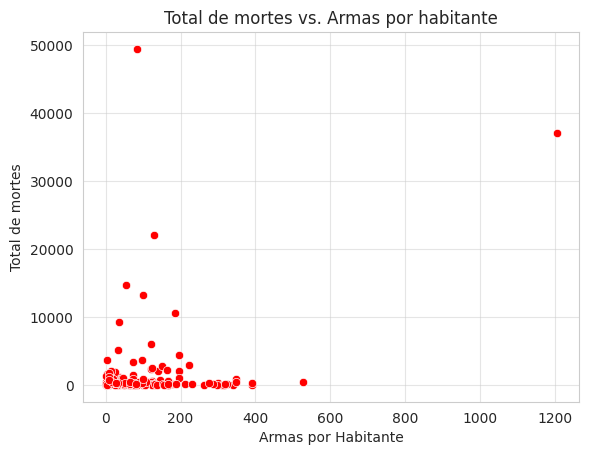

In [ ]:
#quero visualizar o total de mortes vs. armas por habitante
sns.scatterplot(x='civilian_firearms_per_100', y='total_deaths', data=df, color = 'red')
plt.title('Total de mortes vs. Armas por habitante')
plt.xlabel('Armas por Habitante')
plt.ylabel('Total de mortes')
plt.grid(True, alpha = 0.5)
plt.show()

## Existe um país em que as armas por habitante é baixa (está abaixo da média mundial), mas o total de mortes é o maior da amostra. Adivinhe que país é esse?

## Vamos ver qual é:

In [ ]:
#vou escrever o país com mais mortes totais
df.loc[df['total_deaths'].idxmax()]

,18
country,Brazil
total_deaths,49437.0
violent_deaths,47510.0
violent_deaths_per_100k,21.93
gpi_2023,24.62
gpi_2022,24.65
gpi_2021,24.3
pop,203080756.0
civilian_firearms,17510000
civilian_firearms_per_100,83.0


### Sempre ele: Brasil!

## Rápida comparação: Brasil vs EUA

In [ ]:
#vou escrever as armas dividido por habitantes do Brasil
df.loc[df['country'] == 'Brazil']

,country,total_deaths,violent_deaths,violent_deaths_per_100k,gpi_2023,gpi_2022,gpi_2021,pop,civilian_firearms,civilian_firearms_per_100
18,Brazil,49437.0,47510.0,21.93,24.62,24.65,24.3,203080756.0,17510000,83.0


### Vamos comparar isso com os EUA que têm uma quantidade de armas nas mãos de civis enorme:

In [ ]:
#vou escrever os dados dos eua
df.loc[df['country'] == 'United States']

,country,total_deaths,violent_deaths,violent_deaths_per_100k,gpi_2023,gpi_2022,gpi_2021,pop,civilian_firearms,civilian_firearms_per_100
151,United States,37040.0,13001.0,3.96,24.48,24.4,23.37,335893238.0,393347000,1205.0


### Veja uma rápida comparação entre esses dois países:




### Diferença percentual de armas de fogo nas mãos de civis (por habitante) entre EUA e Brasil

In [ ]:
# Filtrar o número de armas por habitante para os dois países
us_firearms = df.loc[df['country'] == 'United States', 'civilian_firearms'].values[0]
brazil_firearms = df.loc[df['country'] == 'Brazil', 'civilian_firearms'].values[0]

# Calcular a diferença percentual
percentual_diff = ((us_firearms - brazil_firearms) /us_firearms) * 100

# Exibir o resultado
print(f"A diferença percentual de armas por habitante entre os Estados Unidos e o Brasil é de {percentual_diff:.2f}%.")


A diferença percentual de armas por habitante entre os Estados Unidos e o Brasil é de 95.55%.


### Ou seja, o total de armas nas mãos de civis (por habitante) é 95% menor

### Diferença percentual do total de mortos entre EUA e Brasil:




In [ ]:
#filtrar o número de mortes dos dois países
us_deaths = df.loc[df['country'] == 'United States', 'total_deaths'].values[0]
brazil_deaths = df.loc[df['country'] == 'Brazil', 'total_deaths'].values[0]

#calcular a diferença percentual
percentual_diff = ((us_deaths - brazil_deaths) / us_deaths) * 100
print(f"A diferença percentual de mortes entre os Estados Unidos e o Brasil é de {percentual_diff:.2f}%.")

A diferença percentual de mortes entre os Estados Unidos e o Brasil é de -33.47%.


### O total de mortes no EUA é 33% menor, mesmo com eles tendo uma população de 100 mi a mais.

### Diferença percentual do total de mortes violentas (por 100 mil habitantes) entre EUA e Brasil:

In [ ]:
#calcula a diferença percentual de mortes por 100k habitantes
us_deaths_100k = df.loc[df['country'] == 'United States', 'violent_deaths_per_100k'].values[0]
brazil_deaths_100k = df.loc[df['country'] == 'Brazil', 'violent_deaths_per_100k'].values[0]

#calcular a diferença percentual
percentual_diff = ((us_deaths_100k - brazil_deaths_100k) / us_deaths_100k) * 100
print(f"A diferença percentual de mortes por 100k habitantes entre os Estados Unidos e o Brasil é de {percentual_diff:.2f}%.")

A diferença percentual de mortes por 100k habitantes entre os Estados Unidos e o Brasil é de -453.79%.


### Esse dado é ainda mais assustador. As mortes a cada 100 mil habitantes são 453% (quase 5 vezes) maior no Brasil em relação aos EUA.

### Ou seja, há muito mais armas nas mãos da população estadunidense e mesmo assim as mortes violentas são muito menores.


### Ou seja, não necessariamente uma coisa está relacionada a outra. Existem diversos outros fatores por trás disso.

### **Conclusão temporária:**
---


#### Não é possível afirmar que mais armas gerarão mais mortes em um país, com base em dados. Porém, observa-se que existe sim uma correlação positiva moderada entre as duas variáveis indicando que maior acesso a armas implica aumento de mortes totais em um país (e consequentemente de mortes violentas). No caso do Brasil, que a violência é inacreditável, certamente ocorreria um aumento das mortes, caso a quantidade de armas po civis aumentasse.

#### Essa é a tese inicial aqui.



---



---



## **Modelagem de Machine Learning: Clusterização utilizando o modelo KMeans Clustering**




### **Explicando o que será feito:**
### Esse modelo é ótimo para perceber semelhança entre variáveis. A ideia aqui é que a partir desse treino o modelo kmeans perceba as semelhanças entre os diferentes países dessa amostra e então os dividiremos em grupos a partir disso com base na população, nas mortes violentas e com base também na questão de armas de fogo na mão de civis.

### Vou montar vários agrupamentos de países a partir de algumas características semelhantes entre eles. Vou agrupar por População, Mortes a cada 100 mil habitantes e Armas de fogo em posse de civis (por habitante).

### Outras bibliotecas que vou utilizar agora:

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

### Pré-processamento de dados:

In [42]:
# Preparar os dados
features = ['pop', 'violent_deaths_per_100k', 'civilian_firearms_per_100']
X = df[features].values

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Encontrar o número ideal de clusters com base nessas características:

In [43]:
# Encontrar o número ideal de clusters
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

optimal_k = optimal_number_of_clusters(wcss)
print(f"Número ideal de clusters: {optimal_k}")

Número ideal de clusters: 6


### Teremos, portanto, 6 grupos de países! Eu sou muito desobediente e prefiro treinar com 5 clusters. Motivo: testei ambas as clusters e cheguei à conclusão que a análise ficaria mais robusta a partir de 5. Um dos motivos foi a não agregação de Brasil e México na mesma cluster, quando o modelo é treinado com 6. Do ponto de vista é inconcebível, devido às fortes semelhanças na questão de população, deafio em lidar com a questão drogas, domínio territorial de grupos criminosos e economia.

### Treinar o modelo para finalmente agrupar em 5:

In [44]:
# Treinar o modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adicionar as labels de cluster ao DataFrame original
df['Cluster'] = cluster_labels

### Treinamos!

### Visualizar isso em 3d:

In [76]:
#vou criar uma paleta de cores. uma para cada cluster. são 6 clusters
color = ['tomato', 'deepskyblue', 'lawngreen', 'mediumslateblue', 'fuchsia', 'mediumblue', 'bisque', 'lightgreen']

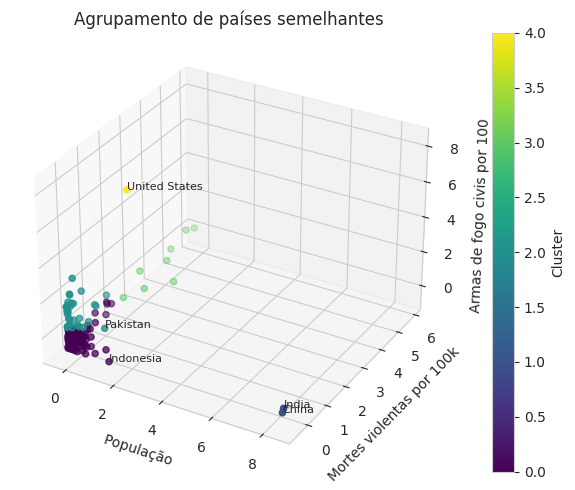

In [46]:
# Visualizar os resultados em um gráfico 3D
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=cluster_labels, cmap='viridis')

ax.set_xlabel('População ')
ax.set_ylabel('Mortes violentas por 100k ')
ax.set_zlabel('Armas de fogo civis por 100 ')
ax.set_title(f'Agrupamento de países semelhantes')

plt.colorbar(scatter, label='Cluster')

# Adicionar rótulos para alguns países (por exemplo, os 5 com maior população)
top_5 = df.nlargest(5, 'pop')
for idx, row in top_5.iterrows():
    ax.text(X_scaled[idx, 0], X_scaled[idx, 1], X_scaled[idx, 2], row['country'], fontsize=8)

plt.tight_layout()
plt.show()

### O gráfico abaixo será interativo. Sim, você vai pode mexer nele de um lado para o outro.

In [47]:
# Criar o gráfico 3D
fig = go.Figure()

# Adicionar o gráfico de dispersão 3D com cores baseadas nos clusters
fig.add_trace(go.Scatter3d(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    z=X_scaled[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,  # Cores baseadas nos clusters
        colorscale='viridis',  # Escolhe o cmap
        colorbar=dict(title='Cluster')
    ),
    text=df['country'],  # Adicionar os nomes dos países como texto ao passar o mouse
))

# Configurar os eixos e o título
fig.update_layout(
    scene=dict(
        xaxis_title='População',
        yaxis_title='Mortes violentas por 100k',
        zaxis_title='Armas de fogo civis por 100',
    ),
    title='Agrupamento de países semelhantes',
    width=900,
    height=600
)

# Adicionar rótulos para os 5 países com maior população
top_5 = df.nlargest(5, 'pop')
for idx, row in top_5.iterrows():
    fig.add_trace(go.Scatter3d(
        x=[X_scaled[idx, 0]],
        y=[X_scaled[idx, 1]],
        z=[X_scaled[idx, 2]],
        mode='text',
        text=[row['country']],
        textposition='top right',
        showlegend=False
    ))

# Mostrar o gráfico interativo
fig.show()


### Vejamos com mais detalhes cada cluster:

In [53]:
# Criar um DataFrame para cada cluster
cluster_dfs = {}
for i in range(5):
    cluster_dfs[i] = df[df['Cluster'] == i].copy()
    print(f"\nCluster {i}:")
    print(f"Número de países: {len(cluster_dfs[i])}")
    #quero apenas as colunas 'pop', 'violent_deaths_per_100k', 'civilian_firearms_per_100' em cada cluster
    cluster_dfs[i] = cluster_dfs[i][['country', 'pop', 'violent_deaths_per_100k', 'civilian_firearms_per_100']]



Cluster 0:
Número de países: 114

Cluster 1:
Número de países: 2

Cluster 2:
Número de países: 34

Cluster 3:
Número de países: 8

Cluster 4:
Número de países: 1


### Visualizar as 5 primeiras linhas de dados de cada cluster:

In [54]:
#vou escrever as 5 primeiras linhas de cada cluster
for i, cluster_df in cluster_dfs.items():
    print(f"\nCluster {i}:")
    print(cluster_df.head())


Cluster 0:
       country         pop  violent_deaths_per_100k  civilian_firearms_per_100
0  Afghanistan  34262840.0                     1.13                        125
1      Albania   2761785.0                     1.47                        120
2      Algeria  46700000.0                     0.32                         21
3       Angola  35121734.0                     0.53                        112
4    Argentina  47067441.0                     3.79                         74

Cluster 1:
   country           pop  violent_deaths_per_100k  civilian_firearms_per_100
28   China  1.409670e+09                     0.02                         36
61   India  1.404910e+09                     0.57                         53

Cluster 2:
                   country         pop  violent_deaths_per_100k  \
7                  Austria   9170647.0                     0.15   
16  Bosnia and Herzegovina   3264873.0                     0.27   
24                  Canada  41012563.0                    

### Distribuição de valores de armas em algumas clusters selecionadas:
#### Vou colocar apenas o da cluster mais diversa que é a 0. Do restante é pouco interessante e não diz nada.

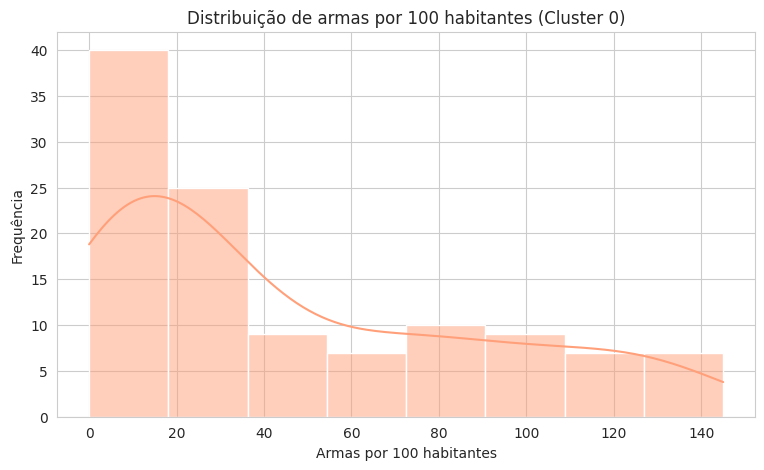

In [82]:
#vou colocar um gráfico de distribuição de armas por cluster (clusters 0, 1 e 4) e cor
for i, cluster_df in cluster_dfs.items():
    if i in [0]:
        plt.figure(figsize=(9, 5))
        sns.histplot(cluster_df['civilian_firearms_per_100'], color= 'lightsalmon', kde=True)
        plt.title(f'Distribuição de armas por 100 habitantes (Cluster {i})')
        plt.xlabel('Armas por 100 habitantes')
        plt.ylabel('Frequência')
        plt.show()

### Veja: a distribuição de armas por habitante é mais frequetemente baixa. Indo de 0 a 20 na sua maioria.

### Visualizando os dados em 2d, agora:

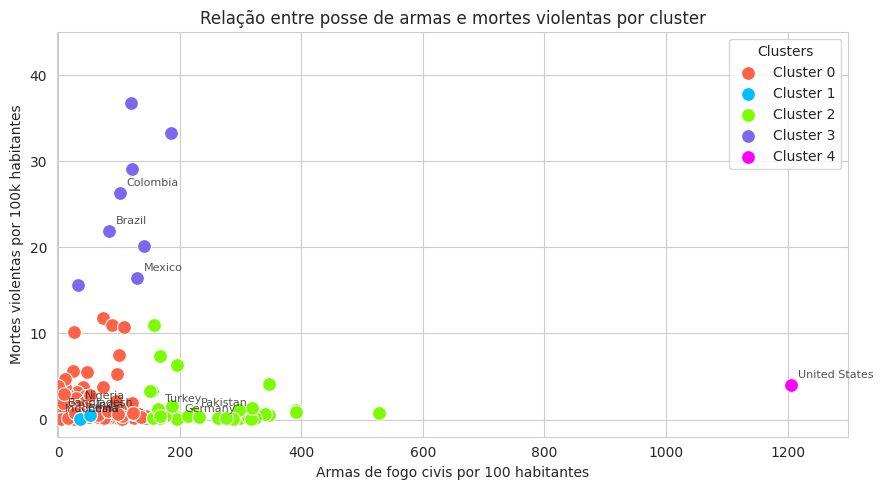

In [58]:
# Configurar o estilo do gráfico
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")

# Criar o gráfico de dispersão
for i, cluster_df in cluster_dfs.items():
    sns.scatterplot(
        data=cluster_df,
        x='civilian_firearms_per_100',
        y='violent_deaths_per_100k',
        label=f'Cluster {i}',
        s=100,  # Tamanho dos pontos
        color=color[i]  # Cor baseada na lista de cores criado para cada cluster
    )

# Adicionar rótulos para alguns países em cada cluster
for i, cluster_df in cluster_dfs.items():
    # Selecionar os 3 países com maior população em cada cluster
    top_3 = cluster_df.nlargest(3, 'pop')
    for idx, row in top_3.iterrows():
        plt.annotate(
            row['country'],
            (row['civilian_firearms_per_100'], row['violent_deaths_per_100k']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            alpha=0.8
        )

# Configurar os rótulos e o título
plt.xlabel('Armas de fogo civis por 100 habitantes')
plt.ylabel('Mortes violentas por 100k habitantes')
plt.title('Relação entre posse de armas e mortes violentas por cluster')

# Ajustar a legenda
plt.legend(title='Clusters')

# Ajustar os limites dos eixos para melhor visualização
plt.xlim(-2, 1300)
plt.ylim(-2, 45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Estudando as estatísticas descritivas de cada cluster:

In [59]:
# Imprimir estatísticas resumidas para cada cluster
for i, cluster_df in cluster_dfs.items():
    print(f"\nEstatísticas do Cluster {i}:")
    print(cluster_df[['violent_deaths_per_100k', 'civilian_firearms_per_100', 'pop']].describe())
    print("\nPaíses no cluster:")
    print(", ".join(cluster_df['country'].tolist()))


Estatísticas do Cluster 0:
       violent_deaths_per_100k  civilian_firearms_per_100           pop
count               114.000000                 114.000000  1.140000e+02
mean                  1.592149                  46.561404  2.950358e+07
std                   2.283313                  43.170794  4.336979e+07
min                   0.010000                   0.000000  7.772240e+05
25%                   0.280000                  10.000000  5.704459e+06
50%                   0.680000                  28.000000  1.400407e+07
75%                   2.160000                  78.000000  3.402399e+07
max                  11.840000                 145.000000  2.816038e+08

Países no cluster:
Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Australia, Azerbaijan, Bahrain, Bangladesh, Belarus, Belgium, Benin, Bhutan, Bolivia, Botswana, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, Chile, Costa Rica, Croatia, Cuba, Czech Republic, Denmark, Djibo

### Procurando o Brasil:

In [62]:
#vou escrever os dados do cluster 3
cluster_dfs[3].head()

,country,pop,violent_deaths_per_100k,civilian_firearms_per_100
18,Brazil,203080756.0,21.93,83
29,Colombia,52695952.0,26.36,101
40,El Salvador,6884888.0,36.78,120
53,Guatemala,17843132.0,29.06,121
58,Honduras,9892632.0,20.15,141


### Com base nesse modelo treinado, o Brasil possui semelhanças, no que se refere à questão, a países como Colômbia, El Salvador, Guatemala, Honduras e Vezenuela. Todos esses países passaram (a maioria ainda passa, com excessão de El Salvador que melhorou no quesito) por crises de segurança pública muito profundas.

### Vamos visualizar os dados para essa cluster 3 (mais violenta):

In [61]:
cluster_df3 = cluster_dfs[3]

### Gráfico interativo:

In [65]:
# Criar o gráfico de dispersão
fig = px.scatter(
    cluster_df3,
    x='civilian_firearms_per_100',
    y='pop',
    size='violent_deaths_per_100k',
    color='country',
    hover_name='country',
    labels={
        'pop': 'População',
        'civilian_firearms_per_100': 'Armas de fogo civis por 100 pessoas',
        'violent_deaths_per_100k': 'Mortes violentas por 100k pessoas'
    },
    title='Relação entre população, armas de fogo e mortes violentas (Cluster 3)'
)

# Ajustar o layout e tamanho do gráfico
fig.update_layout(
    width=800,
    height=500,
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Armas de fogo civis por 100 pessoas",
    yaxis_title="População",
    legend_title="País",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="white"
    ),
    # Configurações para o tema escuro
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(gridcolor='rgba(255,255,255,0.2)'),
    yaxis=dict(gridcolor='rgba(255,255,255,0.2)'),
)

# Atualizar cores do texto dos eixos
fig.update_xaxes(title_font=dict(color='white'), tickfont=dict(color='white'))
fig.update_yaxes(title_font=dict(color='white'), tickfont=dict(color='white'))

# Mostrar o gráfico
fig.show()

### Gráfico de bolhas dos países da cluster 3:

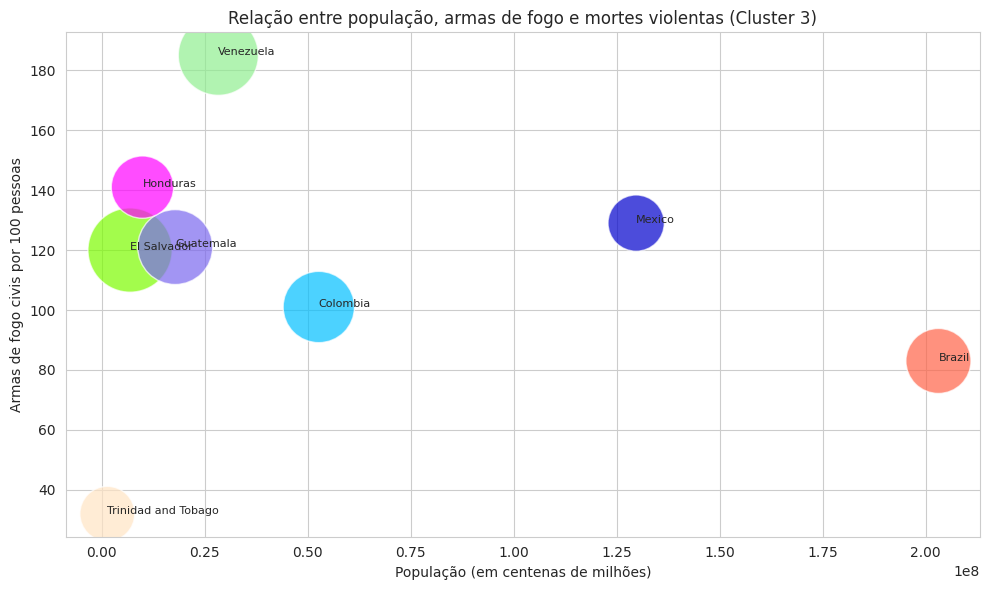

In [77]:
# Obter as cores baseadas no índice do DataFrame (ajuste conforme o número de clusters)
colors = [color[i % len(color)] for i in range(len(cluster_df))]

# Criar o gráfico de bolhas
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    cluster_df['pop'],  # Eixo X: população
    cluster_df['civilian_firearms_per_100'],  # Eixo Y: armas de fogo civis por 100 habitantes
    s=cluster_df['violent_deaths_per_100k'] * 100,  # Tamanho das bolas (ajustado para melhor visualização)
    c=colors,  # Cor das bolas com base na paleta personalizada
    alpha=0.7,  # Transparência das bolhas
    edgecolor='w'  # Cor da borda das bolhas
)

# Adicionar rótulos aos eixos
plt.xlabel('População (em centenas de milhões)')
plt.ylabel('Armas de fogo civis por 100 pessoas')
plt.title('Relação entre população, armas de fogo e mortes violentas (Cluster 3)')

# Adicionar legenda do tamanho das bolhas
bubble_sizes = [10, 20, 30]  # Exemplos de tamanhos de bolhas para legenda
for size in bubble_sizes:
    plt.scatter([], [], s=size * 100, c='gray', label=f'{size} mortes violentas por 100k')


# Adicionar rótulos dos países
for idx, row in cluster_df.iterrows():
    plt.text(row['pop'], row['civilian_firearms_per_100'], row['country'], fontsize=8)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Maior a bolha maior a violência por habitante.

### Vamos comparar isso a cluster 0. Essa cluster tem população e mortes violentas em níveis moderados.

In [ ]:
cluster_dfs[0]

,country,pop,violent_deaths_per_100k,civilian_firearms_per_100
0,Afghanistan,34262840.0,1.13,125.0
1,Albania,2761785.0,1.47,120.0
2,Algeria,46700000.0,0.32,21.0
3,Angola,35121734.0,0.53,112.0
4,Argentina,47067441.0,3.79,74.0
...,...,...,...,...
150,United Kingdom,67596281.0,0.04,0.0
153,Uzbekistan,36963262.0,0.09,4.0
155,Vietnam,100300000.0,0.13,16.0
157,Zambia,19610769.0,2.95,9.0


In [ ]:
cluster_df0 = cluster_dfs[0]

In [ ]:
# Criar o gráfico de dispersão
fig = px.scatter(
    cluster_df0,
    x='pop',
    y='civilian_firearms_per_100',
    size='violent_deaths_per_100k',  # Tamanho das bolas baseado em 'violent_deaths_per_100k'
    color='country',  # Cor baseada no país
    hover_name='country',  # Nome do país ao passar o mouse
    labels={
        'pop': 'População',
        'civilian_firearms_per_100': 'Armas de fogo civis por 100 pessoas',
        'violent_deaths_per_100k': 'Mortes violentas por 100k pessoas'
    },
    title='Relação entre população, armas de fogo e mortes violentas (Cluster 1)'
)

# Ajustar o layout e tamanho do gráfico
fig.update_layout(
    width=1000,  # Largura em pixels
    height=600,  # Altura em pixels
    title={
        'y':0.95,  # Posição vertical do título
        'x':0.5,   # Posição horizontal do título
        'xanchor': 'center',  # Alinhamento horizontal do título
        'yanchor': 'top'  # Alinhamento vertical do título
    },
    xaxis_title="Armas de fogo civis por 100 pessoas",
    yaxis_title="População",
    legend_title="País",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="black"
    )
)

# Mostrar o gráfico
fig.show()

### Visualizar os dados da cluster 1 em um gráfico de bolhas:

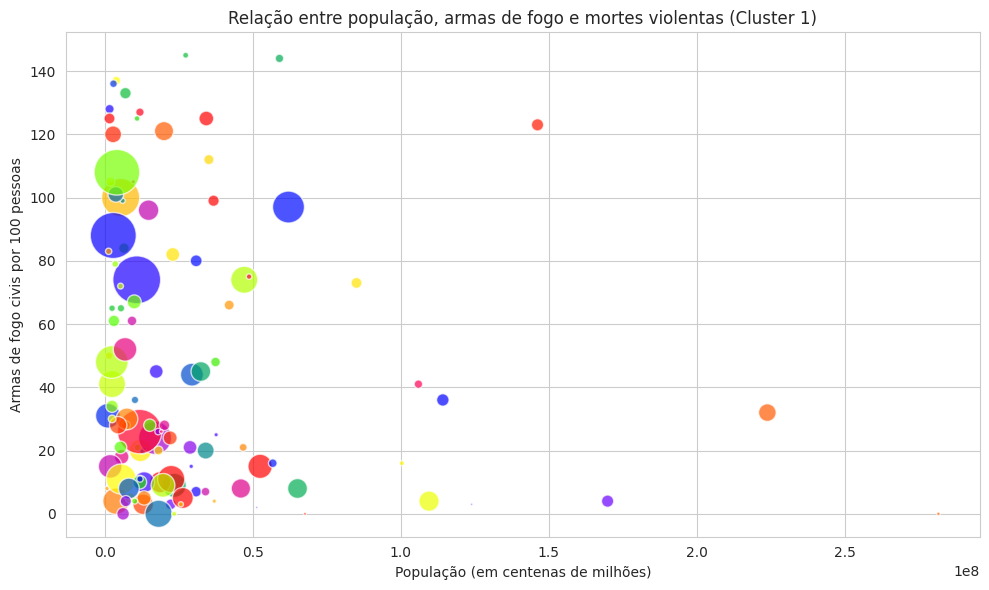

In [ ]:
# Selecionar o DataFrame do cluster desejado
cluster_df = cluster_dfs[0]  # Aqui você pode mudar para o cluster que quiser

# Criar o gráfico de bolhas
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    cluster_df['pop'],  # Eixo X: população
    cluster_df['civilian_firearms_per_100'],  # Eixo Y: armas de fogo civis por 100 habitantes
    s=cluster_df['violent_deaths_per_100k'] * 100,  # Tamanho das bolas (ajustado para melhor visualização)
    c=range(len(cluster_df)),  # Cor das bolas com base no índice do DataFrame
    cmap='prism',  # Paleta de cores
    alpha=0.7,  # Transparência das bolhas
    edgecolor='w'  # Cor da borda das bolhas
)

# Adicionar rótulos aos eixos
plt.xlabel('População (em centenas de milhões)')
plt.ylabel('Armas de fogo civis por 100 pessoas')
plt.title('Relação entre população, armas de fogo e mortes violentas (Cluster 1)')

# Adicionar legenda do tamanho das bolhas
bubble_sizes = [10, 20, 30]  # Exemplos de tamanhos de bolhas para legenda
for size in bubble_sizes:
    plt.scatter([], [], s=size * 100, c='gray', label=f'{size} mortes violentas por 100k')


# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Ficou muito bonito esse gráfico!

### Nele vemos como essa agrupamento é grande e diverso. As bolhas de violência são ligeiramente menores que no caso do agrupamento (cluster) 3. A posse de armas nas mãos de civis também é baixa.

### A situação da criminalidade dos países dessa cluster são mais controlados que a da nossa cluster 3. Seria ótimo podermos mais para frente estudarmos as características institucionais, jurídicas e o contexto econômico desses países de forma a procurar algum padrão. Isso, porém, é trabalho para outro dia.

## **Considerações Finais:**
### A análise realizada com **machine learning** revelou padrões, demonstrando que a violência não pode ser explicada apenas pela posse de armas. Fatores geopolíticos, regionais e a força de organizações criminosas desempenham papéis cruciais, especialmente em países da América Latina, onde o controle territorial por parte de grupos criminosos exacerba as já altas taxas de violência.

### Essa parte 1 está finalizada.



---



---



### O código abaixo serve para salvar o arquivo das clusters na nuvem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/cluster_df1.csv'  # Defina o caminho para salvar o arquivo no seu Google Drive
cluster_df1.to_csv(file_path, index=False)  # Salvar o DataFrame como CSV

In [ ]:
file_path = '/content/drive/My Drive/cluster_df4.csv'  # Defina o caminho para salvar o arquivo no seu Google Drive
cluster_df4.to_csv(file_path, index=False)  # Salvar o DataFrame como CSV

In [ ]:
#vou juntar os dataframes 1 e 4 com a função concat
df_14 = pd.concat([cluster_df1, cluster_df4])

In [ ]:
df_14.head()

,country,pop,violent_deaths_per_100k,civilian_firearms_per_100
0,Afghanistan,34262840.0,1.13,125.0
1,Albania,2761785.0,1.47,120.0
2,Algeria,46700000.0,0.32,21.0
3,Angola,35121734.0,0.53,112.0
4,Argentina,47067441.0,3.79,74.0


In [ ]:
file_path = '/content/drive/My Drive/df14.csv'  # Defina o caminho para salvar o arquivo no seu Google Drive
df_14.to_csv(file_path, index=False)  # Salvar o DataFrame como CSV